In [ ]:
#finite square well of quantum mechanics in python
#now a crystal lattice of protons is essentially a sequence of wells, so if we can solve the schoringer equation for one well we can use approximation methods to get the
#the energy eigenvalues for a sequence of wells
#what we are gonna do is to solve the schrodinger equation and it's set up as where the hamiltonian is a tri-diagoanl matrix, which is a very large matrix as well
#and this is a very efficient way for solving large matrices getting the eigenvalues which are the energies, and the eingenvectors which are the wave functions
#we are gonna start reviewing the finite square well

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

Get value of $V_o$ and energies corresponding to bound states ($E∈ [-V_o, 0] $).Note that $V_o= 36$ means that the actual potential energy is 36 times $ħ/(2ma^{2}$)

In [ ]:
V0 = 36
E = np.linspace(-V0, 0, 100000)


Get the  right hand side (RHS) and left hand sides of the two equations above

In [ ]:
RHS = np.sqrt(-E)
LHS1 = np.sqrt(E+V0)*np.tan(np.sqrt(E+V0))
LHS2 = -np.sqrt(E+V0)/np.tan(np.sqrt(E+V0+1e-9))

Plot the curves. the energies correspond to the x values where the red curve (RHS) intersects with the left hand sides of the two equtions.


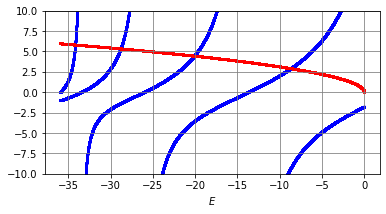

In [ ]:
plt.figure(figsize=(6,3))
plt.scatter(E, LHS1, s=1, color='blue')
plt.scatter(E, LHS2, s=1, color='blue')
plt.scatter(E, RHS, s=1, color='red')
plt.ylim(-10,10)
plt.grid(color = 'grey')
plt.xlabel('$E$')
plt.show()


Thus we can see that there area 4 possible bound energy states in this finite square well. Lets solve fo the intersection points of these curves. Below, f1 corresponds to RHS-LHS1 and f2 corresponds to RHS-LHS2. The enrgies that make these expressions equal to zero correspond to the interaction points above.


In [ ]:
def f1(E,V0):
  return np.sqrt(E+V0)*np.tan(np.sqrt(E+V0))-np.sqrt(-E)
def f2(E,V0, eps=1e-10): #We notice that we have this little epsilon here, this is a little numerical trick and I add kit here, is a very small number
#but what it does is that stops the tang, cause i have a cotang here, which is one over tangent and this blows up when e is equal to negative V naught, cotangent of zero is infinity
#and i don't want that, and so what I do is I add a little small number here and this sort of stops that from ocurring.
  return np.sqrt(E+V0+eps)/np.tan(np.sqrt(E+V0+eps)) + np.sqrt(-E)


Plot f1 and f2 as a function of energy

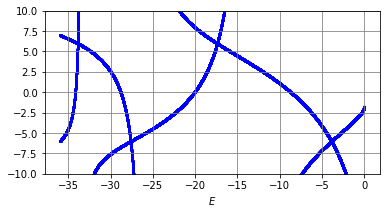

In [ ]:
#we just plot this functions, and we look for the intersection points with zero, which corresponds to the bound energies

plt.figure(figsize=(6,3))
plt.scatter(E,f1(E,V0), s=1, color='blue')
plt.scatter(E,f2(E,V0), s=1, color='blue')
plt.grid(color='grey')
plt.ylim(-10,10)
plt.xlabel('$E$')
plt.show()

Now its set up so that the energies (x-values) corresponding to the locations where the clue curves above intersect y=0 are the bound energies of the system. The reason we do this is because the problem "Find x so that f(x)=0" is how things are done in a computer. This is done below:


In [ ]:
f1s = f1(E, V0)
f2s = f2(E, V0)

zero_crossings_even = np.where(np.diff(np.sign(f1s)) * (np.abs(f1s[:-1])<3).astype(float))[0]
zero_crossings_odd = np.where(np.diff(np.sign(f2s)) * (np.abs(f2s[:-1])<3).astype(float))[0]
zero_crossings = np.sort(np.concatenate([zero_crossings_even, zero_crossings_odd]))
Es_method1 =  (E[zero_crossings] + E[zero_crossings+1])/2

In [ ]:
E # so i have my energy array it is just a bunch of different energies it goes from negative 36 to zero (which is minus V0 to zero) and I want to find the points where
#so the first thing we are gonna do is we are gonna take the sign of f1 (f1 is just part of the blue curves above), so if is negative the sign is negative one if it is positive
#the sign is plus 0ne
#np.sign(f1s)

array([-3.600000e+01, -3.599964e+01, -3.599928e+01, ..., -7.200072e-04,
       -3.600036e-04,  0.000000e+00])

In [ ]:
Es_method1

array([-34.19152192, -28.82422824, -20.11322113,  -8.68922689])

So the first excited state, for example, is E'_1 = -28.82. Following step 2 of the equtions set up in the report. the real enrgy is then; E_1 = -28.82 $ħ/(2ma^{2}$)


Solving Numerically



so first  i gonna discritize by using 10000 points in x they're gonna span from negative two to two, and remember the well goes from negative one to one, son I am a little bit including points outside the well as well.



In [ ]:
N = 100000
x = np.linspace(-3,3,N) #creates an array of 100000 values between -3 and 3 here we consider values that goes further than
dx = np.diff(x)[0]  # we create an array with the difference between an element of the array with its subsequent, namely x=[2,6,5] ==> np.diff(x)=[4,-1], then we take the first value of the array
#since we are talking about the x is spaced equaly then it is direct that the diff is the same value for each value of the array, hence it is possible to take the first elemet and used it


[-3.      -2.99994 -2.99988 ...  2.99988  2.99994  3.     ]


Create the main diagonal and off diagonal of the tridiagonal matrix shown above. what you need to do is to define the main diagonal of your matrix.

In [ ]:
main_diag = 2*np.ones(N)/dx**2 -V0*((x>=-1)*(x<=1)).astype(float) # this is just a quick way of making the well in this problem
off_diag =  -np.ones(N-1)/dx**2 # it is N-1 because it has one left element

Use the eigh_tridiagonal function from scipy to solve for the eigenvalues Es and eigenvectors psis of this matrix. Use the select_range option to only find eigenvalues in the given range (corresponding to bound states)

In [ ]:
Es_method2, psis = eigh_tridiagonal(main_diag, off_diag, select='v', select_range=(-V0,0))

Plot a sample eigenfunction:

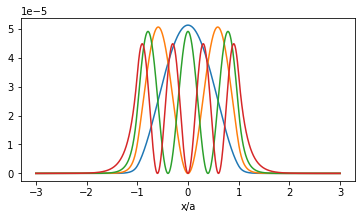

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(x, np.abs(psis.T[0])**2)
plt.plot(x, np.abs(psis.T[1])**2)
plt.plot(x, np.abs(psis.T[2])**2)
plt.plot(x, np.abs(psis.T[3])**2)
plt.xlabel('x/a')
plt.show()